In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

rng = default_rng()

In [2]:
# 向左和向右游走的概率
p, q = (0.5, 0.5)
# 游走的步数
N_steps = 100
# 初始位置
start = 0

In [3]:
def random_walk(p, q, N_steps, start):
    x = start
    walk_path = [x]
    for _ in range(N_steps):
        if rng.random() <= p:
            x += 1
        else:
            x -= 1
        walk_path.append(x)
    return walk_path

In [4]:
# 做一次随机游走
walk_path = random_walk(p, q, N_steps, start)

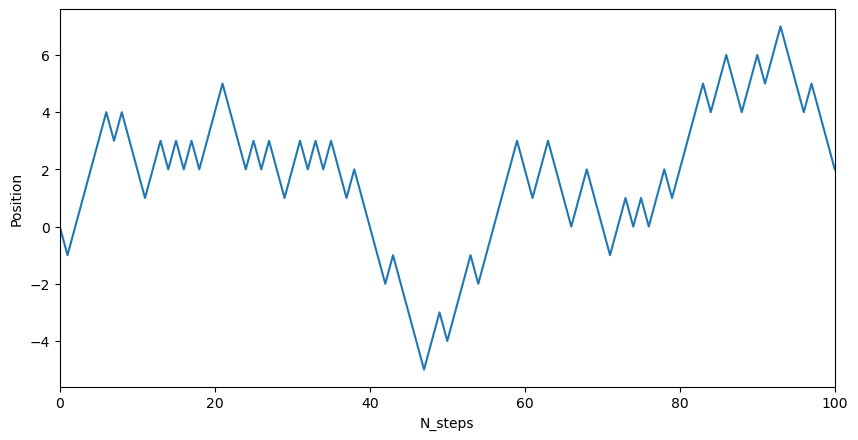

In [5]:
# 画出随机游走的路径
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(walk_path)
plt.xlabel("N_steps")
plt.ylabel("Position")
plt.xlim((0, 100))
plt.show()

根据模型的对称性，游走最终位置的期望值应该是0，但是单次随机游走一般不会回到原点。

In [6]:
# 做100次随机游走并记录路径
walk_list = [random_walk(p, q, N_steps, start) for _ in range(100)]

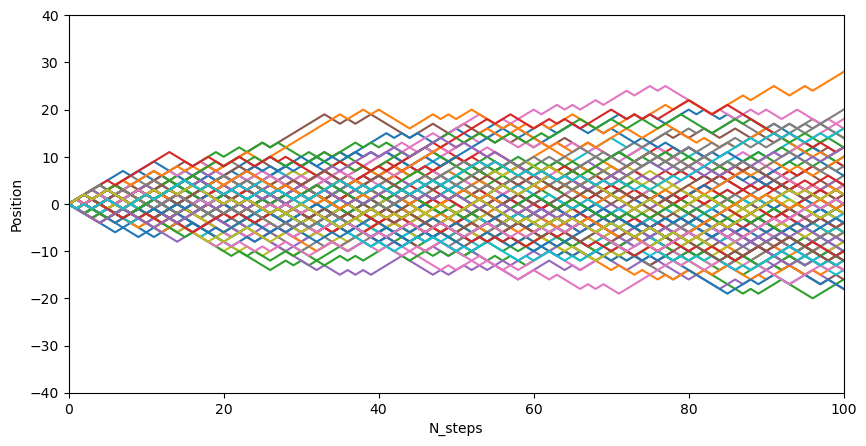

In [7]:
# 画出随机游走的路径
plt.figure(figsize=(10, 5), dpi=100)
for walk in walk_list:
    plt.plot(walk)
plt.xlabel("N_steps")
plt.ylabel("Position")
plt.xlim((0, 100))
plt.ylim((-40, 40))
plt.show()

从多次随机游走的结果可以看出，不论步数是多少，总位移的期望值总是0，并且方差会随着步数的增加而增加。

In [8]:
# 对行走路径的每一步的总位移做平方，并对30条路径做平均，得到每一步的总位移的方差
var = np.average(np.array(walk_list)**2, 0)

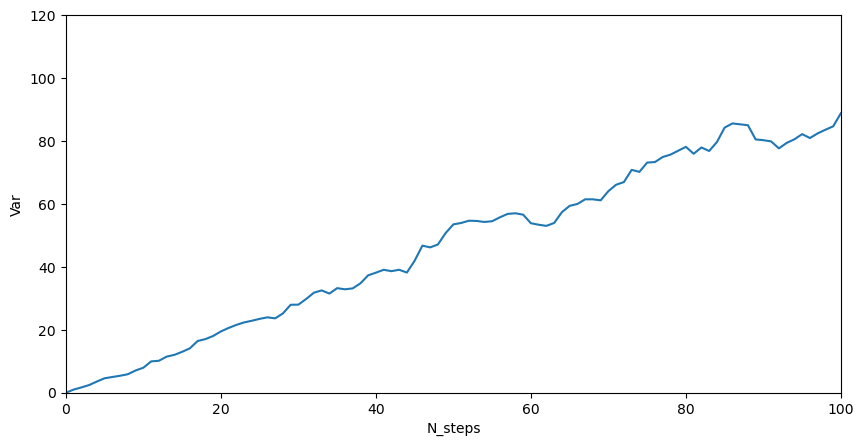

In [9]:
# 画出方差随步数变化的情况
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(var)
plt.xlabel("N_steps")
plt.ylabel("Var")
plt.xlim((0, 100))
plt.ylim((0, 120))
plt.show()

下面讨论二维的情况，如果随机游走的概率具有对称性，则总位移的期望为0  
如果两个维度的游走没有干扰，则方差可以直接相加，$\langle r^2\rangle=\langle x^2\rangle+\langle y^2\rangle$  
期望和方差都和一维的情况相似

In [10]:
def random_walk_2d(p_list, N_steps, start):
    p1 = p_list[0]
    p12 = p1 + p_list[1]
    p123 = p12 + p_list[2]
    x, y = start
    walk_path_2d = [[x, y]]
    for _ in range(N_steps):
        xi = rng.random()
        if xi <= p1:
            x += 1
        elif xi <= p12:
            x -= 1
        elif xi <= p123:
            y += 1
        else:
            y -= 1
        walk_path_2d.append([x, y])
    return walk_path_2d

In [11]:
p_list = [0.25, 0.25, 0.25, 0.25]
N_steps = 200
start = [0, 0]

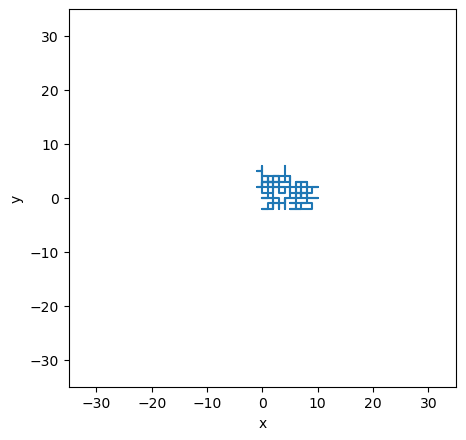

In [12]:
# 做一次随机游走并绘图
walk_path_2d = random_walk_2d(p_list, N_steps, start)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(*np.array(walk_path_2d).T)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((-35, 35))
plt.ylim((-35, 35))
plt.show()

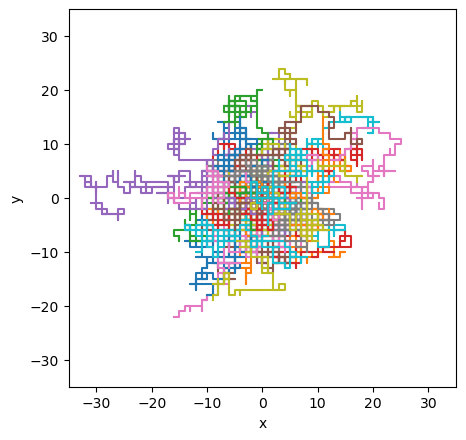

In [13]:
# 做50次随机游走并绘图
walk_list_2d = [random_walk_2d(p_list, N_steps, start) for _ in range(50)]

plt.figure(figsize=(5, 5), dpi=100)
for walk in walk_list_2d:
    plt.plot(*np.array(walk).T)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((-35, 35))
plt.ylim((-35, 35))
plt.show()

步数较少时，随机游走的期望和方差可以通过概率理论精确计算，步数较大时，则可以通过蒙特卡罗方法进行估计。

如果有科学问题可以用随机游走的概率模型描述，就可以使用蒙特卡罗方法。  
将泊松方程$\frac{\partial^2\phi}{\partial x^2}+\frac{\partial^2\phi}{\partial y^2}=q(x,y)$写成差分形式$\phi_0=\frac{1}{4}(\phi_1+\phi_2+\phi_3+\phi_4-h^2 q_0)$  
如果取大量的$\phi_1,\phi_2,\phi_3,\phi_4$，其中每一个出现的概率都是1/4，计算其平均值，再根据微分方程得到$q_0$，就可以得到$\phi_0$的估计值。  
由于只知道边界条件，$\phi_1,\phi_2,\phi_3,\phi_4$的值也需要估计，因此需要不断获取相邻点的估计值，直到公式中出现边界上的点。  
以上过程和随机游走非常相似，因此通过多次随机游走得到某一点的函数值的估计值。  
下面用一个简单的例子示范，取$q(x,y)=0$，边界条件为$\phi(x,0)=\phi(x,1)=0,\phi(0,y)=\phi(1,y)=1$

In [14]:
def qxy(x, y):
    return 0
# 将场域划分为101*101个格点，并设置边界条件
x_edge = (0, 100)
y_edge = (0, 100)
h = 0.01
x_edge_value = 1
y_edge_value = 0
# 估计(0.5,0.5)的函数值，对应(50,50)格点
start = (50, 50)
estimate = []

# 做1000次随机游走
N = 10**3
for i in range(N):
    value = 0   # 用于保存估计值
    x, y = start
    path = [(x, y)]
    while True:
        xi = rng.random()
        if xi <= 0.25:
            x += 1
        elif xi <= 0.5:
            x -= 1
        elif xi <= 0.75:
            y += 1
        else:
            y -= 1
        path.append((x, y))
        # 游走到达边界时，根据边界和路径计算估计值
        if x in x_edge:
            value += x_edge_value
            break
        if y in y_edge:
            value += y_edge_value
            break
    for x, y in path:
        value += qxy(x, y)*h*h/4
    estimate.append(value)
    
phi_0 = sum(estimate)/N
print(phi_0)
    

0.49
